## EDA xtreme

### Construcción KPI 1: 
#### Localidades con una población > 1000 hab. con alto grado de insatisfacción de su servicio de internet fijo.

Importar librerías necesarias.

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importar datasets sobre los que se hace el primer análisis:<br>
- Accesos_Internet_fijo_por_velocidad_bajada_y_localidad.csv: Con información de cantidad de accesos a internet fijo por velocidad a nivel de localidad.<br>
- Conectividad_al_servicio_Internet.csv: Del cual tomaré la información de población y coordenadas.

In [536]:
data = pd.read_csv("Dataset/Internet/Por localidad/Accesos_Internet_fijo_por_velocidad_bajada_y_localidad.csv")
data2 = pd.read_csv("Dataset/Internet/Por localidad/Conectividad_al_servicio_Internet.csv")

Información general del cada dataset: Tamaño, columnas, tipo de datos, nulos. <br>
Visualización de primeras filas con head().

In [537]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3086 entries, 0 to 3085
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3086 non-null   object 
 1   Partido     3086 non-null   object 
 2   Localidad   3086 non-null   object 
 3   Link Indec  3086 non-null   object 
 4   Otros       959 non-null    float64
 5   0,256 Mbps  29 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    669 non-null    float64
 8   0,512 Mbps  524 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   316 non-null    float64
 11  1 Mbps      948 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    16 non-null     float64
 14  2 Mbps      768 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    3 non-null      float64
 17  3 Mbps      1374 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    383 non-null   

In [538]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           3836 non-null   float64
 14  Latitud        4312 non-null   float64
 15  Longitud       4312 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.1+ KB


In [539]:
data.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,75 Mbps,78 Mbps,80 Mbps,82 Mbps,83 Mbps,85 Mbps,90 Mbps,92 Mbps,95 Mbps,100 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [540]:
data2.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,SI,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,SI,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,--,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


Visualizo filas duplicadas a nivel de localidad: total 9, y también la cantidad de información por fila para tomar la decisión de cuál eliminar. Nos quedamos con la primera fila, ya que es la que tiene más información.

In [541]:
indices = data[data.duplicated(subset=["Provincia","Partido","Localidad"], keep=False)].index
duplicados = data.iloc[indices]
duplicados["Count_not_null"] = data[data.duplicated(subset=["Provincia","Partido","Localidad"], keep=False)].count(axis=1)
duplicados[["Provincia","Partido","Localidad","Count_not_null"]]


C:\Users\Milena\AppData\Local\Temp\ipykernel_19076\1157833938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados["Count_not_null"] = data[data.duplicated(subset=["Provincia","Partido","Localidad"], keep=False)].count(axis=1)


,Provincia,Partido,Localidad,Count_not_null
2885,SANTIAGO DEL ESTERO,Avellaneda,Herrera,7
2886,SANTIAGO DEL ESTERO,Avellaneda,Herrera,5
2907,SANTIAGO DEL ESTERO,Capital,San Pedro,6
2908,SANTIAGO DEL ESTERO,Capital,San Pedro,5
2926,SANTIAGO DEL ESTERO,Copo,San José del Boquerón,6
2927,SANTIAGO DEL ESTERO,Copo,San José del Boquerón,5
2935,SANTIAGO DEL ESTERO,General Taboada,Añatuya,17
2936,SANTIAGO DEL ESTERO,General Taboada,Añatuya,5
2941,SANTIAGO DEL ESTERO,Guasayán,Lavalle,8
2942,SANTIAGO DEL ESTERO,Guasayán,Lavalle,5


In [542]:
data.drop_duplicates(subset=["Provincia","Partido","Localidad"], keep="first", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3077 entries, 0 to 3085
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3077 non-null   object 
 1   Partido     3077 non-null   object 
 2   Localidad   3077 non-null   object 
 3   Link Indec  3077 non-null   object 
 4   Otros       950 non-null    float64
 5   0,256 Mbps  29 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    669 non-null    float64
 8   0,512 Mbps  524 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   316 non-null    float64
 11  1 Mbps      948 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    16 non-null     float64
 14  2 Mbps      768 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    3 non-null      float64
 17  3 Mbps      1374 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    383 non-null    floa

Vemos que hay muchos nulos, esto corresponde a que no hay accesos que registren esa velocidad de bajada, por lo que se le imputa el valor 0.

In [543]:
data.fillna(0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3077 entries, 0 to 3085
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3077 non-null   object 
 1   Partido     3077 non-null   object 
 2   Localidad   3077 non-null   object 
 3   Link Indec  3077 non-null   object 
 4   Otros       3077 non-null   float64
 5   0,256 Mbps  3077 non-null   float64
 6   0,375 Mbps  3077 non-null   float64
 7   0,5 Mbps    3077 non-null   float64
 8   0,512 Mbps  3077 non-null   float64
 9   0,625 Mbps  3077 non-null   float64
 10  0,75 Mbps   3077 non-null   float64
 11  1 Mbps      3077 non-null   float64
 12  1,25 Mbps   3077 non-null   float64
 13  1,5 Mbps    3077 non-null   float64
 14  2 Mbps      3077 non-null   float64
 15  2,2 Mbps    3077 non-null   float64
 16  2,5 Mbps    3077 non-null   float64
 17  3 Mbps      3077 non-null   float64
 18  3,3 Mbps    3077 non-null   float64
 19  3,5 Mbps    3077 non-null   floa

Ahora agrupamos por rangos de velocidad para mejor tratamiento de la información. <br>
- Obtenemos el total de accesos por localidad, así como el porcentaje de accesos con una velocidad menor a 10Mbps, suficiente para descargas y navegación básica, y menor a 25Mbps, recomendada para videoconferencias y trabajo virtual.

In [544]:
data["<= 1 Mbps"] = data.iloc[:, range(5,12)].sum(axis=1)
data["> 1 Mbps, <= 5 Mbps"] = data.iloc[:, range(12,23)].sum(axis=1)
data["> 5 Mbps, <= 10 Mbps"] = data.iloc[:, range(23,30)].sum(axis=1)
data["> 10 Mbps, <= 15 Mbps"] = data.iloc[:, range(30,35)].sum(axis=1)
data["> 15 Mbps, <= 20 Mbps"] = data.iloc[:, range(35,40)].sum(axis=1)
data["> 20 Mbps, <= 25 Mbps"] = data.iloc[:, range(40,45)].sum(axis=1)
data["> 25 Mbps, <= 30 Mbps"] = data.iloc[:, range(45,50)].sum(axis=1)
data["> 30 Mbps, <= 50 Mbps"] = data.iloc[:, range(50,63)].sum(axis=1)
data["> 50 Mbps"] = data.iloc[:, range(63,83)].sum(axis=1)
data["Total"] = data.iloc[:, range(4,83)].sum(axis=1)
data["% <= 10Mbps"] = np.where(data["Total"] == 0, 0, (data["<= 1 Mbps"] + data["> 1 Mbps, <= 5 Mbps"] + 
                                                       data["> 5 Mbps, <= 10 Mbps"]) / data["Total"] * 100)
data["% <= 25Mbps"] = np.where(data["Total"] == 0, 0, (data["<= 1 Mbps"] + data["> 1 Mbps, <= 5 Mbps"] + 
                                                       data["> 5 Mbps, <= 10 Mbps"] + data["> 10 Mbps, <= 15 Mbps"] + 
                                                       data["> 15 Mbps, <= 20 Mbps"] + data["> 20 Mbps, <= 25 Mbps"]) 
                                                       / data["Total"] * 100)
data_z = data.drop(data.columns[range(5,83)], axis = 1)
data_z.head()

,Provincia,Partido,Localidad,Link Indec,Otros,<= 1 Mbps,"> 1 Mbps, <= 5 Mbps","> 5 Mbps, <= 10 Mbps","> 10 Mbps, <= 15 Mbps","> 15 Mbps, <= 20 Mbps","> 20 Mbps, <= 25 Mbps","> 25 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total,% <= 10Mbps,% <= 25Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,23.0,241.0,631.0,4564.0,604.0,211.0,63.0,37.0,9.0,6383.0,14.021620,98.292339
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,100.000000,100.000000
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,1.0,181.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,100.000000,100.000000
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,100.000000,100.000000
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,172.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,181.0,99.447514,99.447514


Traemos el segundo dataset y tomamos los datos de población y coordenadas.<br>
Elimino duplicados resultantes del merge entre ambos datasets.

In [545]:
lista_dataz = ['VILLA RAMALLO', 'Chacras De Coria', 'Barrio Del Lago', 'Carrodilla', 'Las Tortugas']
lista_data2 = ['Villa Ramallo', 'CHACRAS DE CORIA', 'Barrio del Lago', 'CARRODILLA', 'LAS TORTUGAS']
data_z['Localidad'] = data_z['Localidad'].replace(r'\s+', ' ', regex=True)
data_z['Localidad'].replace(lista_dataz, lista_data2, inplace=True)

data_z = pd.merge(data_z, data2, on=["Provincia", "Partido", "Localidad"], how="left")
data_z = data_z.drop(data_z.columns[range(18,28)], axis = 1)
data_z.drop(data_z[data_z['Localidad'] == "OTROS"].index, inplace=True)

# Asignar valores a CABA
data_z.loc[data_z['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Poblacion'] = 2890151
data_z.loc[data_z['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Latitud'] = -34.59972222
data_z.loc[data_z['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Longitud'] = -58.38194444

data_z.drop(data_z[data_z.isnull().any(axis=1)].index, inplace=True)
data_z.head()

,Provincia,Partido,Localidad,Link Indec,Otros,<= 1 Mbps,"> 1 Mbps, <= 5 Mbps","> 5 Mbps, <= 10 Mbps","> 10 Mbps, <= 15 Mbps","> 15 Mbps, <= 20 Mbps","> 20 Mbps, <= 25 Mbps","> 25 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total,% <= 10Mbps,% <= 25Mbps,Poblacion,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,23.0,241.0,631.0,4564.0,604.0,211.0,63.0,37.0,9.0,6383.0,14.021620,98.292339,23408.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,100.000000,100.000000,280.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,1.0,181.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,100.000000,100.000000,899.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,100.000000,100.000000,145.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,172.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,181.0,99.447514,99.447514,547.0,-35.164397,-60.081358


In [546]:
indices_z = data_z[data_z.duplicated(subset=["Provincia","Partido","Localidad"], keep=False)].index
data_z.iloc[indices_z] # Visualizo la data duplicada para tomar una decisión.
indices_a_eliminar = [359, 1334, 1424, 1763] # Indices con población = 0.
data_z.drop(index=indices_a_eliminar, inplace=True)
data_z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 0 to 3080
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provincia              2969 non-null   object 
 1   Partido                2969 non-null   object 
 2   Localidad              2969 non-null   object 
 3   Link Indec             2969 non-null   object 
 4   Otros                  2969 non-null   float64
 5   <= 1 Mbps              2969 non-null   float64
 6   > 1 Mbps, <= 5 Mbps    2969 non-null   float64
 7   > 5 Mbps, <= 10 Mbps   2969 non-null   float64
 8   > 10 Mbps, <= 15 Mbps  2969 non-null   float64
 9   > 15 Mbps, <= 20 Mbps  2969 non-null   float64
 10  > 20 Mbps, <= 25 Mbps  2969 non-null   float64
 11  > 25 Mbps, <= 30 Mbps  2969 non-null   float64
 12  > 30 Mbps, <= 50 Mbps  2969 non-null   float64
 13  > 50 Mbps              2969 non-null   float64
 14  Total                  2969 non-null   float64
 15  % <= 10Mb

Como **primer criterio**, tomamos las localidades cuyos accesos con **velocidad < 10Mbps sean mayores al 15%** del total de accesos en la localidad, y adicionalmente tomamos aquellas localidades con una **población mayor a 1000 habitantes.**

In [549]:
localidades_cumplen_criterio_1 = data_z[(data_z['% <= 10Mbps'] > 15) & (data_z['Poblacion'] > 1000)]

In [550]:
total_localidades = data_z.shape[0]
total_localidades_cumplen_criterio = localidades_cumplen_criterio_1.shape[0]
print(f"{total_localidades_cumplen_criterio/total_localidades*100}")

43.75210508588751


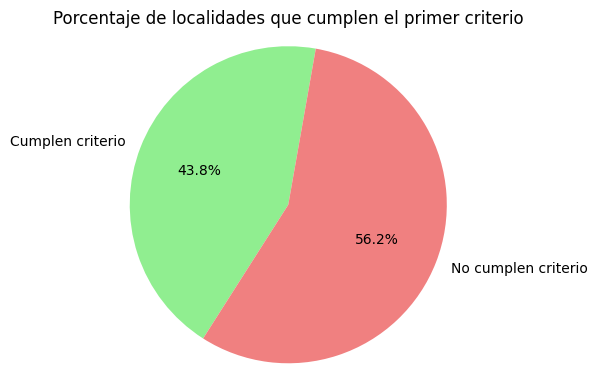

In [551]:
etiquetas = ['Cumplen criterio', 'No cumplen criterio']
valores = [total_localidades_cumplen_criterio, total_localidades - total_localidades_cumplen_criterio]
colores = ['lightgreen', 'lightcoral']

# Crear el diagrama de torta
plt.figure(figsize=(4.5, 4.5))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=80)
plt.title('Porcentaje de localidades que cumplen el primer criterio')
plt.axis('equal')
plt.show()

*Vemos que aproximadamente un 44% de las localidades en Argentina con una población mayor a 1000 habitantes, presentarían un alto grado de insatisfacción con el servicio de internet fijo al tener una velocidad menor a 10Mbps, que es lo mínimo requerido para una navegación básica.*

Como **segundo criterio**, tomamos las localidades cuyos accesos con **velocidad < 25Mbps sean mayores al 15%** del total de accesos en la localidad, y adicionalmente tomamos aquellas localidades con una **población mayor a 1000 habitantes.**

In [552]:
localidades_cumplen_criterio_2 = data_z[(data_z['% <= 25Mbps'] > 15) & (data_z['Poblacion'] > 1000)]

In [553]:
total_localidades = data_z.shape[0]
total_localidades_cumplen_criterio = localidades_cumplen_criterio_2.shape[0]
print(f"{total_localidades_cumplen_criterio/total_localidades*100}")

48.467497473896934


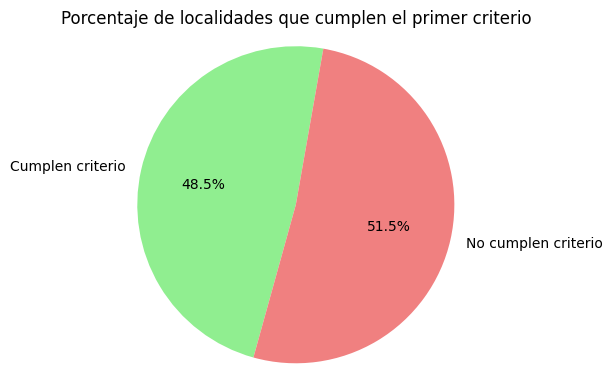

In [555]:
etiquetas = ['Cumplen criterio', 'No cumplen criterio']
valores = [total_localidades_cumplen_criterio, total_localidades - total_localidades_cumplen_criterio]
colores = ['lightgreen', 'lightcoral']

# Crear el diagrama de torta
plt.figure(figsize=(4.5, 4.5))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=80)
plt.title('Porcentaje de localidades que cumplen el primer criterio')
plt.axis('equal')
plt.show()

*Vemos que aproximadamente un 4.5% de las localidades en Argentina con una población mayor a 1000 habitantes, presentarían un grado medio de insatisfacción con el servicio de internet fijo al tener una velocidad menor a 25Mbps (pero mayor a 10Mbps), que es lo recomendado para teletrabajo y streaming.*

Ahora podemos ver la distribución de localidades a nivel de provincia que cumplen con el primer criterio:

In [556]:
localidades_cumplen_criterio = data_z[(data_z['% <= 10Mbps'] > 15) & (data_z['Poblacion'] > 1000)]
total_por_provincia = data_z.groupby('Provincia').size().to_frame(name="Localidades por provincia")
conteo_por_provincia = localidades_cumplen_criterio.groupby('Provincia').size().to_frame(name="Localidades que cumplen el criterio")
resultados = pd.merge(total_por_provincia, conteo_por_provincia, on="Provincia", how="left")
resultados.reset_index()
resultados.fillna(0, inplace=True)
resultados["% Localidades que cumplen el criterio"] = np.where(resultados["Localidades por provincia"] == 0, 0, 
                                                        resultados["Localidades que cumplen el criterio"] / resultados["Localidades por provincia"] * 100)
resultados.sort_values(by="Localidades que cumplen el criterio", ascending=False, inplace=True)
resultados.reset_index(inplace=True)
resultados

,Provincia,Localidades por provincia,Localidades que cumplen el criterio,% Localidades que cumplen el criterio
0,BUENOS AIRES,683,244.0,35.724744
1,CORDOBA,373,196.0,52.546917
2,SANTA FE,346,178.0,51.445087
3,ENTRE RIOS,144,66.0,45.833333
4,SALTA,119,62.0,52.100840
5,MENDOZA,125,56.0,44.800000
6,SANTIAGO DEL ESTERO,126,53.0,42.063492
7,TUCUMAN,65,45.0,69.230769
8,MISIONES,90,45.0,50.000000
9,CHACO,73,44.0,60.273973


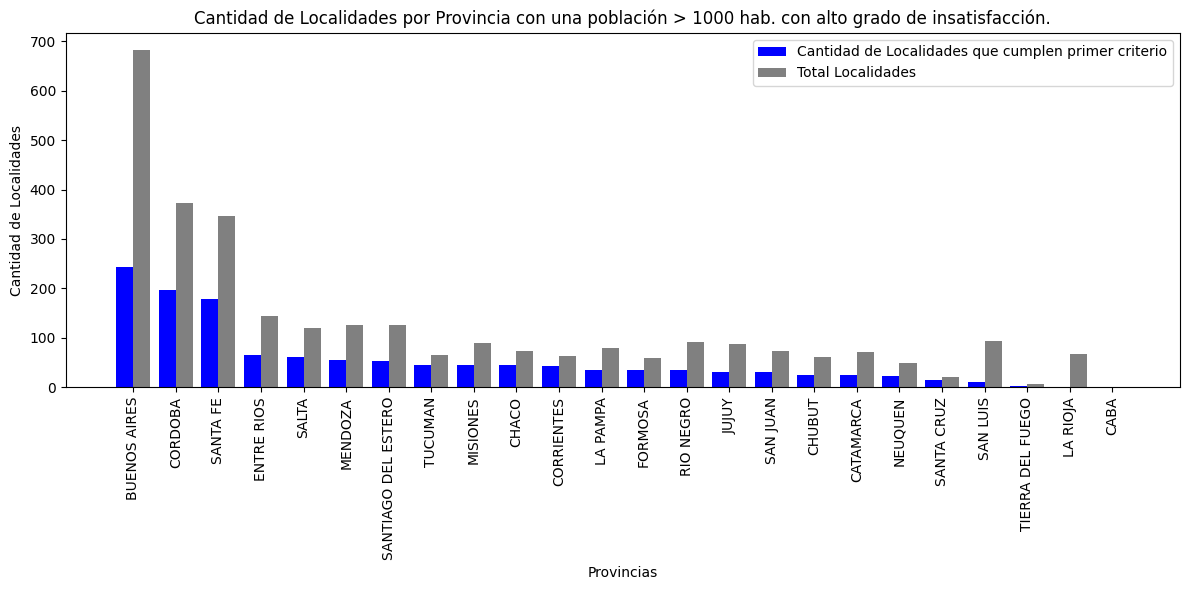

In [557]:
plt.figure(figsize=(12, 6))
indices = range(len(resultados)) # Posición de los índices para el eje x (posición de las barras)

# Barras para la cantidad de localidades que cumplen el criterio
plt.bar(indices, resultados['Localidades que cumplen el criterio'], width=0.4, label='Cantidad de Localidades que cumplen primer criterio', color='blue')

# Barras para la cantidad total de localidades por provincia
plt.bar([index + 0.4 for index in indices], resultados['Localidades por provincia'], width=0.4, label='Total Localidades', color='gray')

# Etiquetas del eje x (provincias)
plt.xticks([index + 0.4 / 2 for index in indices], resultados['Provincia'], rotation=90)

# Etiquetas de los ejes y el título
plt.xlabel('Provincias')
plt.ylabel('Cantidad de Localidades')
plt.title('Cantidad de Localidades por Provincia con una población > 1000 hab. con alto grado de insatisfacción.')
plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

### Construcción KPI 2: 
#### Partidos con cantidad de viviendas > 10000 y una penetración de internet fijo < 70%.

Importar dataset que nos complementa con información importante para el segundo análisis:<br>
- cnphv2022_resultados_provisionales.xlsx: Con información viviendas y población del Censo Nacional de Población, Hogares y Viviendas 2022 para el total del país desagregados por jurisdicción y departamento, partido o comuna.

In [415]:
excel_file = "Dataset/cnphv2022_resultados_provisionales.xlsx" 

Se procede al tratamiento por sheets del archivo excel, ya que tienen ligeras diferencias, por lo que amerita tratamiento individual los dos primeros cuadros correspondientes a CABA y resto de Buenos Aires.

In [416]:
cuadro_1 = pd.read_excel(excel_file, sheet_name="Cuadro 1.1", header=2, skipfooter=19)
cuadro_1["Departamento"] = "Ciudad Autónoma de Buenos Aires"
cuadro_1.insert(0, "Departamento", cuadro_1.pop("Departamento"))
cuadro_1["Provincia"] = "CABA"
cuadro_1.insert(0, "Provincia", cuadro_1.pop("Provincia"))
cuadro_1.drop(columns="Comuna", inplace=True)
cuadro_1

,Provincia,Departamento,Total de viviendas particulares,Total de viviendas colectivas,Total de población,Población en viviendas particulares,Población en viviendas colectivas (1),Población en situación de calle (vía pública)
0,CABA,Ciudad Autónoma de Buenos Aires,1638764,1946,3120612,3092942,26767,903


In [417]:
cuadro_2 = pd.read_excel(excel_file, sheet_name="Cuadro 1.2", header=2, skipfooter=3)
cuadro_2['Partido'] = cuadro_2['Partido'].str.replace('\n', ' ')
delete_c2 = ["24 Partidos del Gran Buenos Aires", "Resto de partidos de la Provincia de Buenos Aires", "Total"]
cuadro_2 = cuadro_2.drop(cuadro_2[cuadro_2["Partido"].isin(delete_c2)].index)
cuadro_2["Provincia"] = "BUENOS AIRES"
cuadro_2.insert(0, "Provincia", cuadro_2.pop("Provincia"))
cuadro_2.rename(columns={'Partido': 'Departamento'}, inplace=True)
cuadro_2

,Provincia,Departamento,Total de viviendas particulares,Total de viviendas colectivas,Total de población,Población en viviendas particulares,Población en viviendas colectivas (1),Población en situación de calle (vía pública)
2,BUENOS AIRES,Almirante Brown,184403,60,585852,583666,2186,///
3,BUENOS AIRES,Avellaneda,144988,64,370939,369556,1383,///
4,BUENOS AIRES,Berazategui,117699,37,360582,360178,404,///
5,BUENOS AIRES,Esteban Echeverría,109969,40,339030,338466,564,///
6,BUENOS AIRES,Ezeiza,65987,18,203283,200487,2796,///
...,...,...,...,...,...,...,...,...
133,BUENOS AIRES,Tres Lomas,4251,10,8825,8751,74,///
134,BUENOS AIRES,25 de Mayo,16272,32,36676,36436,240,///
135,BUENOS AIRES,Villa Gesell,31057,243,38614,38539,75,///
136,BUENOS AIRES,Villarino,13434,48,33170,32979,191,///


A todos los cuadros se le imputan los valores del campo "Provincia", se unen en un sólo dataframe, y se eliminan columnas de poco interés.

In [418]:
provincias = ["CATAMARCA", "CHACO", "CHUBUT", "CORDOBA", "CORRIENTES", "ENTRE RIOS", "FORMOSA", "JUJUY", 
                "LA PAMPA", "LA RIOJA", "MENDOZA", "MISIONES", "NEUQUEN", "RIO NEGRO", "SALTA", "SAN JUAN", 
                "SAN LUIS", "SANTA CRUZ", "SANTA FE", "SANTIAGO DEL ESTERO", "TIERRA DEL FUEGO", "TUCUMAN"]
sheets_names = ['Cuadro 1.{}'.format(i) for i in range(3, 25)] # Lista de nombres de las pestañas a leer

data_frames = [cuadro_1, cuadro_2]
for sheet_name, provincia in zip(sheets_names, provincias):
    data = pd.read_excel(excel_file, sheet_name=sheet_name, header=2, skipfooter=3)
    data = data.drop(data[data["Departamento"] == "Total"].index)
    data['Provincia'] = provincia
    data_frames.append(data)

viviendas_2022 = pd.concat(data_frames, ignore_index=True) # Combina todos los DataFrames en uno solo
viviendas_2022.drop(viviendas_2022.columns[[5,6,7,8]], axis=1, inplace=True)
viviendas_2022.head()

,Provincia,Departamento,Total de viviendas particulares,Total de viviendas colectivas,Total de población
0,CABA,Ciudad Autónoma de Buenos Aires,1638764,1946,3120612.0
1,BUENOS AIRES,Almirante Brown,184403,60,585852.0
2,BUENOS AIRES,Avellaneda,144988,64,370939.0
3,BUENOS AIRES,Berazategui,117699,37,360582.0
4,BUENOS AIRES,Esteban Echeverría,109969,40,339030.0


Se eliminan filas que no tienen información, también 2 localidades cuya información está contenida en la localidad Antártida Argentina, y se eliminan saltos de línea encontrados en el campo Departamento.

In [419]:
viviendas_2022.drop(viviendas_2022[viviendas_2022.isnull().any(axis=1)].index, inplace=True)
delete_antartico = ["Islas del Atlántico Sur", "Antártida Argentina e Islas del Atlántico Sur"]
viviendas_2022['Departamento'] = viviendas_2022['Departamento'].str.replace('\n', ' ')
viviendas_2022 = viviendas_2022.drop(viviendas_2022[viviendas_2022['Departamento'].isin(delete_antartico)].index)
viviendas_2022

,Provincia,Departamento,Total de viviendas particulares,Total de viviendas colectivas,Total de población
0,CABA,Ciudad Autónoma de Buenos Aires,1638764,1946,3120612.0
1,BUENOS AIRES,Almirante Brown,184403,60,585852.0
2,BUENOS AIRES,Avellaneda,144988,64,370939.0
3,BUENOS AIRES,Berazategui,117699,37,360582.0
4,BUENOS AIRES,Esteban Echeverría,109969,40,339030.0
...,...,...,...,...,...
517,TUCUMAN,Simoca,11832,5,35051.0
518,TUCUMAN,Tafí del Valle,15299,153,20091.0
519,TUCUMAN,Tafí Viejo,53517,11,169363.0
520,TUCUMAN,Trancas,10879,50,22478.0


Se combinan las filas de "Tolhuin" y "Río Grande" ya que en la información de ENACOM Tolhuin aparece como una localidad perteneciente a Río Grande.

In [420]:
column_4_sum = ["Total de viviendas particulares", "Total de viviendas colectivas", "Total de población"]

# Realizar la suma de los datos de "Tolhuin" a "Río Grande"
for item in column_4_sum:
    viviendas_2022.loc[viviendas_2022['Departamento'] == 'Río Grande', item] += viviendas_2022.loc[viviendas_2022['Departamento'] == 'Tolhuin', item].sum()

# Eliminar la fila correspondiente a "Tolhuin"
viviendas_2022 = viviendas_2022[viviendas_2022['Departamento'] != 'Tolhuin']
viviendas_2022

,Provincia,Departamento,Total de viviendas particulares,Total de viviendas colectivas,Total de población
0,CABA,Ciudad Autónoma de Buenos Aires,1638764,1946,3120612.0
1,BUENOS AIRES,Almirante Brown,184403,60,585852.0
2,BUENOS AIRES,Avellaneda,144988,64,370939.0
3,BUENOS AIRES,Berazategui,117699,37,360582.0
4,BUENOS AIRES,Esteban Echeverría,109969,40,339030.0
...,...,...,...,...,...
517,TUCUMAN,Simoca,11832,5,35051.0
518,TUCUMAN,Tafí del Valle,15299,153,20091.0
519,TUCUMAN,Tafí Viejo,53517,11,169363.0
520,TUCUMAN,Trancas,10879,50,22478.0


Vemos que hay registros con datos "-", esto corresponde a que no hay viviendas en dicho campo para la localidad en cuestión, por lo que se le imputa el valor 0.<br>
Además nos interesa tener un total de viviendas, por lo que lo calculamos.

In [421]:
viviendas_2022.replace('-', 0, inplace=True)
viviendas_2022["Total de viviendas"] = viviendas_2022["Total de viviendas particulares"] + viviendas_2022["Total de viviendas colectivas"]
viviendas_2022.drop(columns=["Total de viviendas particulares", "Total de viviendas colectivas"], inplace=True)
viviendas_2022.rename(columns={'Departamento': 'Partido'}, inplace=True)
viviendas_2022

C:\Users\Milena\AppData\Local\Temp\ipykernel_19076\3707274643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viviendas_2022.replace('-', 0, inplace=True)
C:\Users\Milena\AppData\Local\Temp\ipykernel_19076\3707274643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viviendas_2022["Total de viviendas"] = viviendas_2022["Total de viviendas particulares"] + viviendas_2022["Total de viviendas colectivas"]
C:\Users\Milena\AppData\Local\Temp\ipykernel_19076\3707274643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Provincia,Partido,Total de población,Total de viviendas
0,CABA,Ciudad Autónoma de Buenos Aires,3120612.0,1640710.0
1,BUENOS AIRES,Almirante Brown,585852.0,184463.0
2,BUENOS AIRES,Avellaneda,370939.0,145052.0
3,BUENOS AIRES,Berazategui,360582.0,117736.0
4,BUENOS AIRES,Esteban Echeverría,339030.0,110009.0
...,...,...,...,...
517,TUCUMAN,Simoca,35051.0,11837.0
518,TUCUMAN,Tafí del Valle,20091.0,15452.0
519,TUCUMAN,Tafí Viejo,169363.0,53528.0
520,TUCUMAN,Trancas,22478.0,10929.0


Para hacer el merge con la data de ENACOM, es preciso normalizar algunos nombres de localidades, estas se listan a continuación:

In [422]:
lista_enacom = ['Coronel de Marina L. Rosales', 'Lomas De Zamora', 'Tres De Febrero', 'O Higgins', 'ItatÍ', 
                'Doctor Manuel Belgrano', 'SANTA BARBARA', 'Coronel Felipe Varela', 'General Angel V. Peñaloza', 
                'General Juan F. Quiroga', 'General Ocampo', 'Libertador Grl. San Martín', 'Catan LilL', 
                'Ñorquincó', 'Grl. José de San Martín', 'Libertador Grl. San Martín', 
                'Juan F. Ibarra', 'ANTARTIDA ARGENTINA']
lista_indec = ["Coronel de Marina Leonardo Rosales", "Lomas de Zamora", "Tres de Febrero", "O'Higgins", "Itatí", 
               "Dr. Manuel Belgrano", "Santa Bárbara", "General Felipe Varela", "Ángel Vicente Peñaloza", 
               "General Juan Facundo Quiroga", "General Ortiz de Ocampo", "Libertador General San Martín", 
               "Catán Lil", "Ñorquinco", "General José de San Martín", 
               "Libertador General San Martín", "Juan Felipe Ibarra", "Antártida Argentina"]
print(len(lista_enacom))
print(len(lista_indec))

18
18


Hacemos las modificaciones necesarias en la data de ENACOM, para poder efectuar el merge con la data de viviendas de INDEC, entre ellas, el agrupamiento a nivel de Partido, ya que la data de INDEC sólo está hasta ese nivel.

In [423]:
data_z_partido = data_z.drop(columns=['Localidad', 'Link Indec', '% <= 10Mbps', '% <= 25Mbps', 'Latitud', 'Longitud'])
data_z_partido = data_z_partido.groupby(['Provincia', 'Partido']).sum()
data_z_partido.reset_index(inplace=True)
data_z_partido.drop(data_z_partido[data_z_partido['Partido'] == "Otros"].index, inplace=True)
data_z_partido['Partido'].replace(lista_enacom, lista_indec, inplace=True)
data_z_partido.loc[(data_z_partido['Partido'] == "La Capital") & (data_z_partido['Provincia'] == "SAN LUIS"), 'Partido'] = "Juan Martín de Pueyrredón"
data_z_partido

,Provincia,Partido,Otros,<= 1 Mbps,"> 1 Mbps, <= 5 Mbps","> 5 Mbps, <= 10 Mbps","> 10 Mbps, <= 15 Mbps","> 15 Mbps, <= 20 Mbps","> 20 Mbps, <= 25 Mbps","> 25 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total,Poblacion
0,BUENOS AIRES,25 de Mayo,0.0,24.0,1558.0,1783.0,4567.0,604.0,211.0,63.0,37.0,10.0,8857.0,32156.0
1,BUENOS AIRES,9 de Julio,1.0,21.0,1515.0,8150.0,1201.0,1037.0,197.0,327.0,2051.0,1008.0,15508.0,40128.0
2,BUENOS AIRES,Adolfo Alsina,10.0,3.0,1360.0,1300.0,1235.0,25.0,0.0,26.0,266.0,34.0,4259.0,15188.0
3,BUENOS AIRES,Adolfo Gonzales Chaves,0.0,3.0,875.0,610.0,1060.0,0.0,0.0,46.0,1.0,0.0,2595.0,1880.0
4,BUENOS AIRES,Alberti,0.0,4.0,342.0,151.0,300.0,0.0,0.0,2.0,0.0,1.0,800.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,TUCUMAN,Simoca,0.0,0.0,389.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0,10135.0
527,TUCUMAN,Tafí Viejo,2.0,52.0,692.0,5648.0,180.0,2470.0,131.0,78.0,1712.0,982.0,11947.0,42126.0
528,TUCUMAN,Tafí del Valle,0.0,17.0,77.0,539.0,11.0,3.0,0.0,10.0,0.0,0.0,657.0,7268.0
529,TUCUMAN,Trancas,0.0,2.0,10.0,528.0,2.0,0.0,0.0,0.0,0.0,0.0,542.0,3065.0


Ahora efectuamos el merge.

In [424]:
data_4_accesos = pd.merge(data_z_partido, viviendas_2022, how="left", on=["Provincia", "Partido"])
data_4_accesos.rename(columns={'Total': 'Total Accesos', 'Poblacion': 'Poblacion ENACOM', 'Total de población': 'Poblacion INDEC'}, inplace=True)
data_4_accesos

,Provincia,Partido,Otros,<= 1 Mbps,"> 1 Mbps, <= 5 Mbps","> 5 Mbps, <= 10 Mbps","> 10 Mbps, <= 15 Mbps","> 15 Mbps, <= 20 Mbps","> 20 Mbps, <= 25 Mbps","> 25 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total Accesos,Poblacion ENACOM,Poblacion INDEC,Total de viviendas
0,BUENOS AIRES,25 de Mayo,0.0,24.0,1558.0,1783.0,4567.0,604.0,211.0,63.0,37.0,10.0,8857.0,32156.0,36676.0,16304.0
1,BUENOS AIRES,9 de Julio,1.0,21.0,1515.0,8150.0,1201.0,1037.0,197.0,327.0,2051.0,1008.0,15508.0,40128.0,52941.0,23630.0
2,BUENOS AIRES,Adolfo Alsina,10.0,3.0,1360.0,1300.0,1235.0,25.0,0.0,26.0,266.0,34.0,4259.0,15188.0,17666.0,8828.0
3,BUENOS AIRES,Adolfo Gonzales Chaves,0.0,3.0,875.0,610.0,1060.0,0.0,0.0,46.0,1.0,0.0,2595.0,1880.0,12954.0,5947.0
4,BUENOS AIRES,Alberti,0.0,4.0,342.0,151.0,300.0,0.0,0.0,2.0,0.0,1.0,800.0,412.0,12726.0,5960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,TUCUMAN,Simoca,0.0,0.0,389.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0,10135.0,35051.0,11837.0
508,TUCUMAN,Tafí Viejo,2.0,52.0,692.0,5648.0,180.0,2470.0,131.0,78.0,1712.0,982.0,11947.0,42126.0,169363.0,53528.0
509,TUCUMAN,Tafí del Valle,0.0,17.0,77.0,539.0,11.0,3.0,0.0,10.0,0.0,0.0,657.0,7268.0,20091.0,15452.0
510,TUCUMAN,Trancas,0.0,2.0,10.0,528.0,2.0,0.0,0.0,0.0,0.0,0.0,542.0,3065.0,22478.0,10929.0


Finalmente, habiendo obtenido el total de viviendas procedente de la información del Censo 2022 de INDEC, y el total de accesos procedente de nuestro dataset de ENACOM, podemos calcular el porcentaje de penetración de internet fijo a nivel de partidos.

In [425]:
data_4_accesos["% accesos"] = np.where(data_4_accesos["Total de viviendas"] == 0, 0, data_4_accesos["Total Accesos"] / data_4_accesos["Total de viviendas"] * 100)
data_4_accesos.head()

,Provincia,Partido,Otros,<= 1 Mbps,"> 1 Mbps, <= 5 Mbps","> 5 Mbps, <= 10 Mbps","> 10 Mbps, <= 15 Mbps","> 15 Mbps, <= 20 Mbps","> 20 Mbps, <= 25 Mbps","> 25 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total Accesos,Poblacion ENACOM,Poblacion INDEC,Total de viviendas,% accesos
0,BUENOS AIRES,25 de Mayo,0.0,24.0,1558.0,1783.0,4567.0,604.0,211.0,63.0,37.0,10.0,8857.0,32156.0,36676.0,16304.0,54.324092
1,BUENOS AIRES,9 de Julio,1.0,21.0,1515.0,8150.0,1201.0,1037.0,197.0,327.0,2051.0,1008.0,15508.0,40128.0,52941.0,23630.0,65.628438
2,BUENOS AIRES,Adolfo Alsina,10.0,3.0,1360.0,1300.0,1235.0,25.0,0.0,26.0,266.0,34.0,4259.0,15188.0,17666.0,8828.0,48.244223
3,BUENOS AIRES,Adolfo Gonzales Chaves,0.0,3.0,875.0,610.0,1060.0,0.0,0.0,46.0,1.0,0.0,2595.0,1880.0,12954.0,5947.0,43.635446
4,BUENOS AIRES,Alberti,0.0,4.0,342.0,151.0,300.0,0.0,0.0,2.0,0.0,1.0,800.0,412.0,12726.0,5960.0,13.422819


Ahora el criterio elegido, tomamos los partidos cuyo **porcentaje de acceso a internet fijo (o penetración) sea menor al 70%,** y adicionalmente tomamos aquellos partidos con **cantidad de viviendas mayor a 10000.**

In [428]:
partidos_cumplen_criterio = data_4_accesos[(data_4_accesos['% accesos'] < 70) & 
                                           (data_4_accesos['Total de viviendas'] > 10000)]

In [429]:
total_partidos = data_4_accesos.shape[0]
total_partidos_cumplen_criterio = partidos_cumplen_criterio.shape[0]
print(f"{total_partidos_cumplen_criterio/total_partidos*100}")

46.2890625


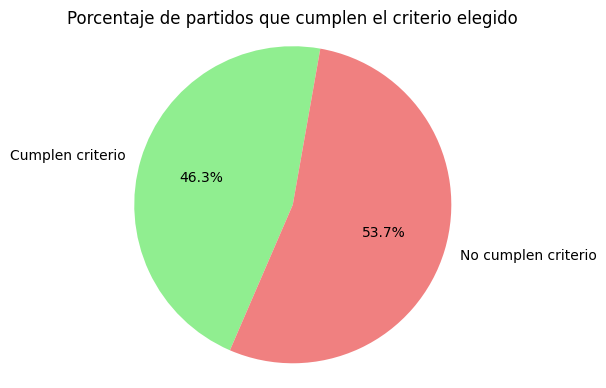

In [430]:
etiquetas = ['Cumplen criterio', 'No cumplen criterio']
valores = [total_partidos_cumplen_criterio, total_partidos - total_partidos_cumplen_criterio]
colores = ['lightgreen', 'lightcoral']

# Crear el diagrama de torta
plt.figure(figsize=(4.5, 4.5))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=80)
plt.title('Porcentaje de partidos que cumplen el criterio elegido')
plt.axis('equal')
plt.show()

*Vemos que aproximadamente un 46% de los partidos de Argentina con una cantidad de viviendas mayor a 10000, presentarían una penetración de internet fijo menor al 70%, lo que muestra una brecha grande de mercado por satisfacer.*

Ahora podemos ver la distribución de partidos a nivel de provincia que cumplen con el criterio elegido:

In [431]:
partidos_cumplen_criterio = data_4_accesos[(data_4_accesos['% accesos'] < 70) & (data_4_accesos['Total de viviendas'] > 10000)]
total_por_provincia = data_4_accesos.groupby('Provincia').size().to_frame(name="Partidos por provincia")
conteo_por_provincia = partidos_cumplen_criterio.groupby('Provincia').size().to_frame(name="Partidos que cumplen el criterio")
resultados_accesos = pd.merge(total_por_provincia, conteo_por_provincia, on="Provincia", how="left")
resultados_accesos.reset_index()
resultados_accesos.fillna(0, inplace=True)
resultados_accesos["% Partidos que cumplen el criterio"] = np.where(resultados_accesos["Partidos por provincia"] == 0, 0, 
                                                        resultados_accesos["Partidos que cumplen el criterio"] / resultados_accesos["Partidos por provincia"] * 100)
resultados_accesos.sort_values(by="Partidos que cumplen el criterio", ascending=False, inplace=True)
resultados_accesos.reset_index(inplace=True)
resultados_accesos

,Provincia,Partidos por provincia,Partidos que cumplen el criterio,% Partidos que cumplen el criterio
0,BUENOS AIRES,134,66.0,49.253731
1,SANTA FE,19,19.0,100.000000
2,CORDOBA,26,17.0,65.384615
3,MISIONES,17,15.0,88.235294
4,MENDOZA,18,15.0,83.333333
5,TUCUMAN,17,14.0,82.352941
6,ENTRE RIOS,17,14.0,82.352941
7,CORRIENTES,25,12.0,48.000000
8,CHACO,25,11.0,44.000000
9,SALTA,23,10.0,43.478261


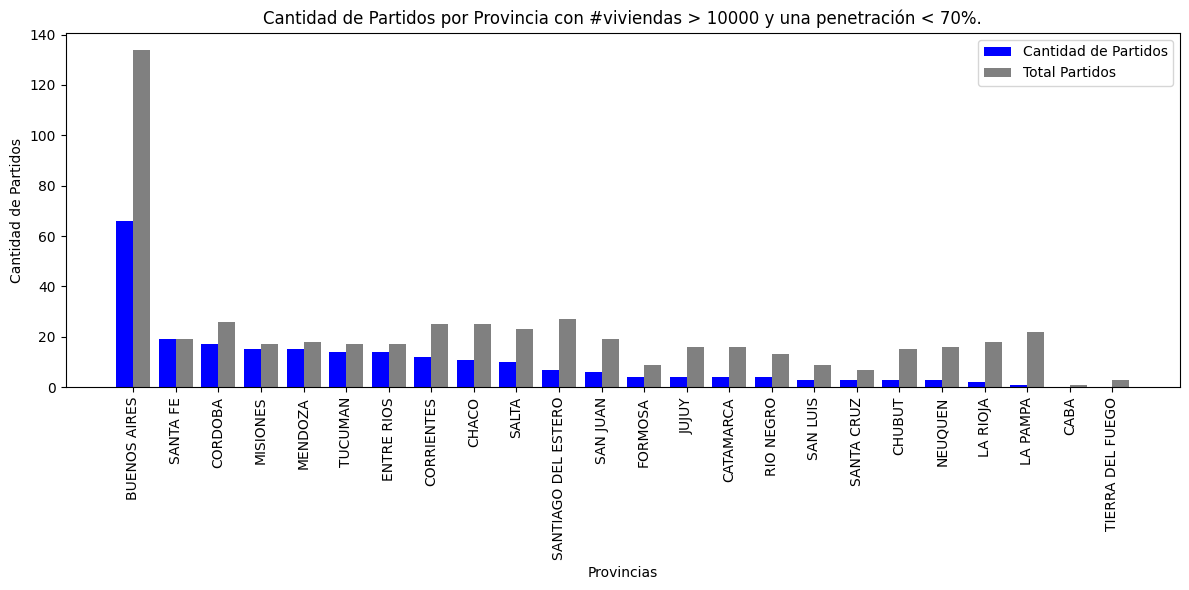

In [432]:
plt.figure(figsize=(12, 6))
indices = range(len(resultados_accesos)) # Posición de los índices para el eje x (posición de las barras)

# Barras para la cantidad de localidades que cumplen el criterio
plt.bar(indices, resultados_accesos['Partidos que cumplen el criterio'], width=0.4, label='Cantidad de Partidos', color='blue')

# Barras para la cantidad total de localidades por provincia
plt.bar([index + 0.4 for index in indices], resultados_accesos['Partidos por provincia'], width=0.4, label='Total Partidos', color='gray')

# Etiquetas del eje x (provincias)
plt.xticks([index + 0.4 / 2 for index in indices], resultados_accesos['Provincia'], rotation=90)

# Etiquetas de los ejes y el título
plt.xlabel('Provincias')
plt.ylabel('Cantidad de Partidos')
plt.title('Cantidad de Partidos por Provincia con #viviendas > 10000 y una penetración < 70%.')
plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

### Por eliminar...

In [137]:
accesos = data_4_accesos["Total Accesos"].sum()
viviendas = data_4_accesos["Total de viviendas"].sum()
print(f"Total accesos: {accesos}, total viviendas: {viviendas}, % penetración: {accesos/viviendas*100}")

Total accesos: 10054377.0, total viviendas: 17802648.0, % penetración: 56.47686231845959


In [169]:
accesos_by_provincia = data_4_accesos.drop(columns=["Partido", "% accesos"])
accesos_by_provincia = accesos_by_provincia.groupby('Provincia').sum()
accesos_by_provincia.reset_index(inplace=True)
accesos_by_provincia["% accesos"] = np.where(accesos_by_provincia["Total de viviendas"] == 0, 0, accesos_by_provincia["Total Accesos"] / accesos_by_provincia["Total de viviendas"] * 100)
accesos_by_provincia.sort_values(by="% accesos", ascending=False, inplace=True)
accesos_by_provincia

,Provincia,Otros,<= 1 Mbps,"> 1 Mbps, <= 6 Mbps","> 6 Mbps, <= 10 Mbps","> 10 Mbps, <= 20 Mbps","> 20 Mbps, <= 30 Mbps","> 30 Mbps, <= 50 Mbps",> 50 Mbps,Total Accesos,Poblacion ENACOM,Poblacion INDEC,Total de viviendas,% accesos
22,TIERRA DEL FUEGO,2307.0,918.0,12849.0,15640.0,18034.0,1797.0,845.0,77.0,52467.0,125823.0,190641.0,67228.0,78.043375
1,CABA,1717.0,6102.0,39918.0,77390.0,61053.0,93264.0,420964.0,559483.0,1259891.0,0.0,3120612.0,1640710.0,76.789378
4,CHUBUT,15003.0,1790.0,61369.0,31856.0,33080.0,14484.0,13134.0,282.0,170998.0,486229.0,603120.0,237133.0,72.110588
10,LA PAMPA,2717.0,2524.0,62811.0,9869.0,12044.0,5256.0,12719.0,1628.0,109568.0,301615.0,366022.0,164242.0,66.711316
0,BUENOS AIRES,26229.0,31263.0,313368.0,321755.0,290126.0,841241.0,1012125.0,1417587.0,4253694.0,14379138.0,17562822.0,6698745.0,63.499865
5,CORDOBA,13104.0,12881.0,165655.0,126005.0,73966.0,35027.0,348823.0,201536.0,976997.0,3085961.0,3978984.0,1633904.0,59.795251
20,SANTA FE,15906.0,12903.0,143796.0,208361.0,84787.0,58169.0,200618.0,127889.0,852429.0,3041935.0,3556522.0,1460580.0,58.362363
11,LA RIOJA,0.0,796.0,3576.0,4692.0,23624.0,5647.0,35483.0,9990.0,83808.0,315217.0,384607.0,150182.0,55.804291
14,NEUQUEN,7885.0,1260.0,39856.0,15623.0,11163.0,13952.0,33497.0,22046.0,145282.0,520984.0,726590.0,274077.0,53.007731
15,RIO NEGRO,22652.0,1499.0,35565.0,18859.0,26926.0,16437.0,20127.0,13310.0,155375.0,580247.0,762067.0,296412.0,52.418593


### Construcción KPI 3: 
#### Localidades por Provincia con una población > 1000 hab. con penetración de FO < 50%.

Creo una función de conversión para el tratamiento de los datos del dataset a cargar para este tercer análisis.

In [433]:
def conv(val):
  temp = val.split(".")
  if val == "- 0":
    val = "0"
  elif "." in val:
    if len(temp[len(temp)-1]) == 2:
      val += "0"
    elif len(temp[len(temp)-1]) == 1:
      val += "00"
  
  val = val.replace(".","")
  return int(val)

Importo dataset:<br>
- Accesos_Internet_fijo_por_tecnología_y_localidad.csv: Con información de cantidad de accesos a internet fijo por tecnología a nivel de localidad.<br><br>
Además, elimino columnas de poco interés, y obtenemos el porcentaje de accesos por fibra óptica, como tecnología top para el servicio de internet fijo.

In [434]:
data3 = pd.read_csv("Dataset/Internet/Por localidad/Accesos_Internet_fijo_por_tecnología_y_localidad.csv", 
                    converters={'ADSL': conv, 'CABLEMODEM': conv, 'DIAL UP': conv, 'FIBRA OPTICA': conv, 
                                'OTROS': conv, 'SATELITAL': conv, 'WIMAX': conv, 'WIRELESS': conv, 'Total general': conv})
data3.drop(columns=['Link Indec', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Unnamed: 13'], inplace=True)
data3["% FIBRA OPTICA"] = np.where(data3["Total general"] == 0, 0, 
                                   data3["FIBRA OPTICA"] / data3["Total general"] * 100)
data3.rename(columns={'Total general': 'Total accesos'}, inplace=True)
data3

,Provincia,Partido,Localidad,FIBRA OPTICA,Total accesos,% FIBRA OPTICA
0,BUENOS AIRES,25 de Mayo,25 de Mayo,5,7262,0.068852
1,BUENOS AIRES,25 de Mayo,Del Valle,0,192,0.000000
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,181,0.000000
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,1127,0.000000
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,6,0.000000
...,...,...,...,...,...,...
3122,TUCUMAN,Tafí Viejo,El Cadillal,0,1,0.000000
3123,TUCUMAN,Trancas,San Pedro de Colalao,0,234,0.000000
3124,TUCUMAN,Trancas,Villa de Trancas,0,308,0.000000
3125,TUCUMAN,Yerba Buena,Villa Carmela,0,2160,0.000000


Normalizamos algunos nombres de localidades para poder hacer el merge con el dataset que contiene la información de población y coordenadas, además corregimos los dobles espacios en blanco.<br>
Se procede al merge y se eliminan columnas y filas de poco interés, adicionalmente se imputan los valores de 'Ciudad Autónoma de Buenos Aires' y se eliminan el resto de filas que no tengan su información completa.


In [435]:
lista_data3 = ['RAMALLO', 'VILLA RAMALLO', 'SARMIENTO', 'SAMPACHO', 'Barrio Del Lago']
lista_data2 = ['Ramallo', 'Villa Ramallo', 'Sarmiento', 'Sampacho', 'Barrio del Lago']
data3['Localidad'] = data3['Localidad'].replace(r'\s+', ' ', regex=True)
data3['Localidad'].replace(lista_data3, lista_data2, inplace=True)

accesos_fo = pd.merge(data3, data2, on=["Provincia", "Partido", "Localidad"], how="left")
accesos_fo = accesos_fo.drop(accesos_fo.columns[range(7,17)], axis = 1)
accesos_fo.drop(accesos_fo[accesos_fo['Localidad'] == "OTROS"].index, inplace=True)

# Asignar valores a CABA
accesos_fo.loc[accesos_fo['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Poblacion'] = 2890151
accesos_fo.loc[accesos_fo['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Latitud'] = -34.59972222
accesos_fo.loc[accesos_fo['Localidad'] == 'Ciudad Autónoma de Buenos Aires', 'Longitud'] = -58.38194444

accesos_fo.drop(accesos_fo[accesos_fo.isnull().any(axis=1)].index, inplace=True)
accesos_fo

,Provincia,Partido,Localidad,FIBRA OPTICA,Total accesos,% FIBRA OPTICA,Poblacion,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,5,7262,0.068852,23408.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Del Valle,0,192,0.000000,899.0,-35.897345,-60.731609
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,181,0.000000,547.0,-35.164397,-60.081358
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,1127,0.000000,4524.0,-35.272779,-59.771933
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,6,0.000000,63.0,-35.483827,-59.988065
...,...,...,...,...,...,...,...,...,...
3127,TUCUMAN,Tafí Viejo,El Cadillal,0,1,0.000000,865.0,-26.632544,-65.205741
3128,TUCUMAN,Trancas,San Pedro de Colalao,0,234,0.000000,3065.0,-26.235765,-65.493852
3129,TUCUMAN,Trancas,Villa de Trancas,0,308,0.000000,4429.0,-26.230732,-65.285166
3130,TUCUMAN,Yerba Buena,Villa Carmela,0,2160,0.000000,14728.0,-26.767775,-65.270844


*A continuación vemos que el porcentaje de utilización de fibra óptica como medio de acceso a internet fijo es del 21%, una tasa cercana al promedio de la región (latam) del 25%, pero muy baja si la comparamos con el referente de la región, que es Chile, con una tasa entre 50-60%.*

In [384]:
total_accesos = accesos_fo["Total accesos"].sum()
accesos_por_fo = accesos_fo["FIBRA OPTICA"].sum()
print(f"Total accesos: {total_accesos}, total accesos por FO: {accesos_por_fo}, % FO: {accesos_por_fo/total_accesos*100}")

Total accesos: 10550164, total accesos por FO: 2212370, % FO: 20.97000577431782


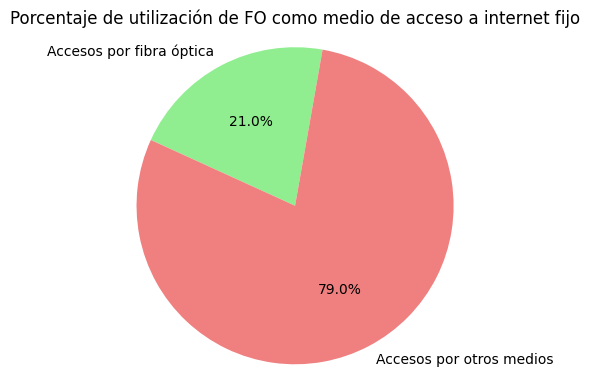

In [385]:
etiquetas = ['Accesos por fibra óptica', 'Accesos por otros medios']
valores = [accesos_por_fo, total_accesos - accesos_por_fo]
colores = ['lightgreen', 'lightcoral']

# Crear el diagrama de torta
plt.figure(figsize=(4.5, 4.5))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=80)
plt.title('Porcentaje de utilización de FO como medio de acceso a internet fijo')
plt.axis('equal')
plt.show()

Ahora el criterio elegido, tomamos las localidades cuyo **porcentaje de acceso a internet fijo por fibra óptica sea menor al 50%,** y adicionalmente tomamos aquellas localidades con una **población mayor a 1000 hab.**

In [388]:
localidades_cumplen_criterio = accesos_fo[(accesos_fo['% FIBRA OPTICA'] < 50) & (accesos_fo['Poblacion'] > 1000)]

In [389]:
total_localidades = accesos_fo.shape[0]
total_localidades_cumplen_criterio = localidades_cumplen_criterio.shape[0]
print(f"{total_localidades_cumplen_criterio/total_localidades*100}")

45.84299436899635


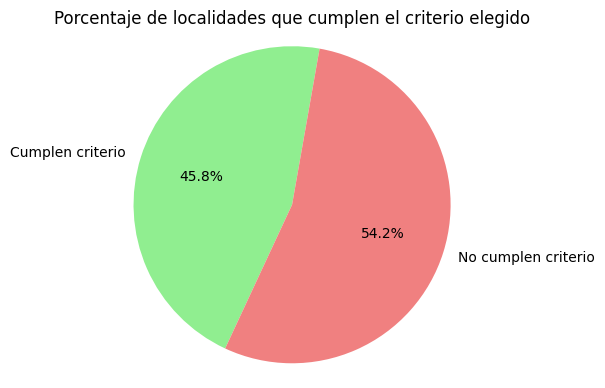

In [390]:
etiquetas = ['Cumplen criterio', 'No cumplen criterio']
valores = [total_localidades_cumplen_criterio, total_localidades - total_localidades_cumplen_criterio]
colores = ['lightgreen', 'lightcoral']

# Crear el diagrama de torta
plt.figure(figsize=(4.5, 4.5))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=80)
plt.title('Porcentaje de localidades que cumplen el criterio elegido')
plt.axis('equal')
plt.show()

*Vemos que aproximadamente un 46% de las localidades en Argentina con una población mayor a 1000 habitantes, presentan un porcentaje de acceso a internet fijo por fibra óptica menor al 50%. Lo cual se corresponde al porcentaje de localidades con velocidades bajas que inciden directamente en la satisfacción del usuario.*

Ahora podemos ver la distribución de localidades a nivel de provincia que cumplen con el criterio elegido:

In [386]:
localidades_cumplen_criterio = accesos_fo[(accesos_fo['% FIBRA OPTICA'] < 50) & (accesos_fo['Poblacion'] > 1000)]
total_por_provincia = accesos_fo.groupby('Provincia').size().to_frame(name="Localidades por provincia")
conteo_por_provincia = localidades_cumplen_criterio.groupby('Provincia').size().to_frame(name="Localidades que cumplen el criterio")
resultados_fo = pd.merge(total_por_provincia, conteo_por_provincia, on="Provincia", how="left")
resultados_fo.reset_index()
resultados_fo.fillna(0, inplace=True)
resultados_fo["% Localidades que cumplen el criterio"] = np.where(resultados_fo["Localidades por provincia"] == 0, 0, 
                                                        resultados_fo["Localidades que cumplen el criterio"] / resultados_fo["Localidades por provincia"] * 100)
resultados_fo.sort_values(by="Localidades que cumplen el criterio", ascending=False, inplace=True)
resultados_fo.reset_index(inplace=True)
resultados_fo

,Provincia,Localidades por provincia,Localidades que cumplen el criterio,% Localidades que cumplen el criterio
0,BUENOS AIRES,687,336,48.908297
1,CORDOBA,382,189,49.476440
2,SANTA FE,347,172,49.567723
3,ENTRE RIOS,147,65,44.217687
4,SALTA,119,54,45.378151
5,SANTIAGO DEL ESTERO,127,51,40.157480
6,MISIONES,90,48,53.333333
7,MENDOZA,120,45,37.500000
8,TUCUMAN,65,45,69.230769
9,CORRIENTES,64,44,68.750000


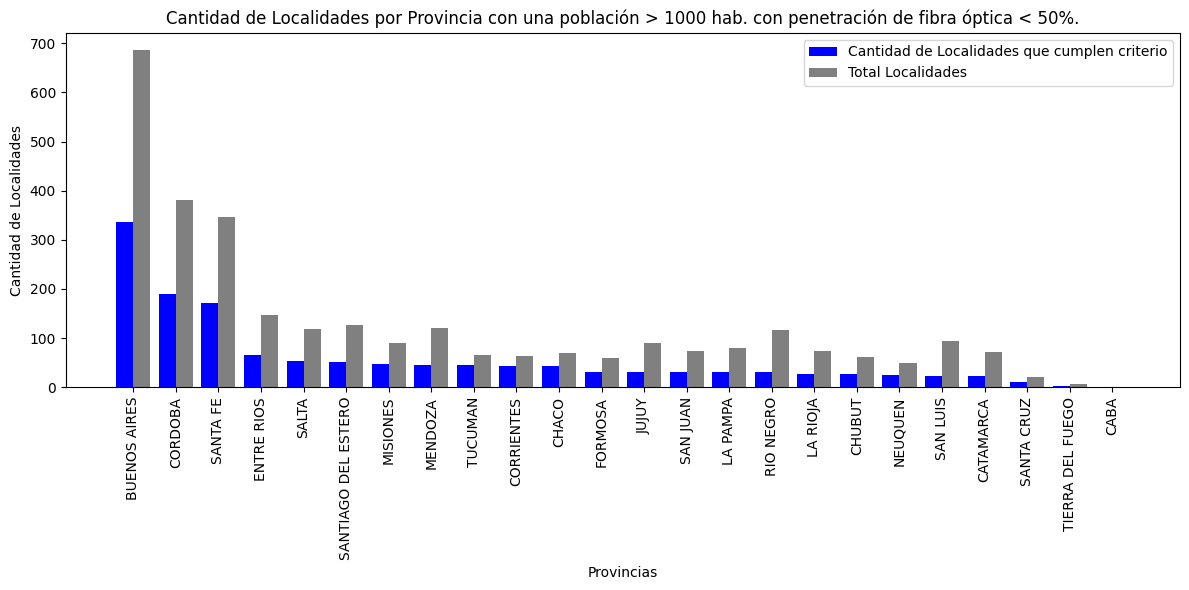

In [392]:
plt.figure(figsize=(12, 6))
indices = range(len(resultados_fo)) # Posición de los índices para el eje x (posición de las barras)

# Barras para la cantidad de localidades que cumplen el criterio
plt.bar(indices, resultados_fo['Localidades que cumplen el criterio'], width=0.4, label='Cantidad de Localidades que cumplen criterio', color='blue')

# Barras para la cantidad total de localidades por provincia
plt.bar([index + 0.4 for index in indices], resultados_fo['Localidades por provincia'], width=0.4, label='Total Localidades', color='gray')

# Etiquetas del eje x (provincias)
plt.xticks([index + 0.4 / 2 for index in indices], resultados_fo['Provincia'], rotation=90)

# Etiquetas de los ejes y el título
plt.xlabel('Provincias')
plt.ylabel('Cantidad de Localidades')
plt.title('Cantidad de Localidades por Provincia con una población > 1000 hab. con penetración de fibra óptica < 50%.')
plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()